In [1]:
!tar -xvf /content/drive/MyDrive/gsoc/lenses.tgz

Streaming output truncated to the last 5000 lines.
lenses/sub/image_100015241301657914033614173596761104525.jpg
lenses/sub/image_100019258133324150161414627571840489791.jpg
lenses/sub/image_100037595382723842062692422633464214182.jpg
lenses/sub/image_100051752665265895059841674396483507971.jpg
lenses/sub/image_100061050381335122405719538882377792147.jpg
lenses/sub/image_100197909896237775032543464299896775969.jpg
lenses/sub/image_100320807541648655929202108326967225168.jpg
lenses/sub/image_100328038748633664502728939498999939178.jpg
lenses/sub/image_100414429896197675867404359083606673007.jpg
lenses/sub/image_100417428819094526025015583687314128031.jpg
lenses/sub/image_100420135487186127075592600341613352821.jpg
lenses/sub/image_100421750518816277824738277767206924323.jpg
lenses/sub/image_100462348085513038268081370949998047036.jpg
lenses/sub/image_100466995792859747756314577205445431577.jpg
lenses/sub/image_1004743667648648993666680301317488948.jpg
lenses/sub/image_1004939629743954907

In [2]:
!git clone https://github.com/DeepLense-Unsupervised/unsupervised-lensing.git

Cloning into 'unsupervised-lensing'...
remote: Enumerating objects: 298, done.
remote: Counting objects: 100% (298/298), done.
remote: Compressing objects: 100% (243/243), done.
remote: Total 298 (delta 104), reused 211 (delta 47), pack-reused 0
Receiving objects: 100% (298/298), 6.92 MiB | 25.88 MiB/s, done.
Resolving deltas: 100% (104/104), done.


Training the model on Lensing Images with No Substructure to learn embeddings. 
**TRAIN_PCT** = **90% (4500 images)**

Considering equal number of samples **(500 images)** of images with substructure and no-substructure for evaluation.

**Images with substructure are considered as anomalies.**

In [3]:
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt

no_sub_path='/content/lenses/no_sub/'
sub_path='/content/lenses/sub/'

no_sub_images = np.array([no_sub_path + f for f in os.listdir(no_sub_path)])
sub_images = np.array([sub_path + f for f in os.listdir(sub_path)])

SEED = 1234
np.random.seed(SEED)

TRAIN_PCT = 0.9
N_EXAMPLES = len(no_sub_images)
idx = np.arange(N_EXAMPLES)
np.random.shuffle(idx)

TRAIN_SIZE = int(N_EXAMPLES*TRAIN_PCT)
train_idx = idx[:TRAIN_SIZE]
test_idx = idx[TRAIN_SIZE:]

train_data = no_sub_images[train_idx]
test_no_sub_data = no_sub_images[test_idx]
test_sub_data = sub_images[test_idx]

len(train_data), len(test_no_sub_data), len(test_sub_data)

os.mkdir('unsupervised-lensing/data')
os.mkdir('unsupervised-lensing/data/train_data')
os.mkdir('unsupervised-lensing/data/train_data/no_sub')

os.mkdir('unsupervised-lensing/data/test_no_sub_data')
os.mkdir('unsupervised-lensing/data/test_no_sub_data/no_sub')

os.mkdir('unsupervised-lensing/data/test_sub_data')
os.mkdir('unsupervised-lensing/data/test_sub_data/sub')

train_path = 'unsupervised-lensing/data/train_data/no_sub/'
test_no_sub_path = 'unsupervised-lensing/data/test_no_sub_data/no_sub/'
test_sub_path = 'unsupervised-lensing/data/test_sub_data/sub/'

for f in train_data:
    src = f
    img = f.split('/')[-1]
    dst = train_path + img
    
    shutil.move(src,dst)
    
for f in test_no_sub_data:
    src = f
    img = f.split('/')[-1]
    dst = test_no_sub_path + img
    
    shutil.move(src,dst)
    
for f in test_sub_data:
    src = f
    img = f.split('/')[-1]
    dst = test_sub_path + img
    
    shutil.move(src,dst)    

In [4]:
os.chdir('unsupervised-lensing')

In [5]:
pwd

'/content/unsupervised-lensing'

In [6]:
from unsupervised_lensing.utils.data_preprocess import process
from unsupervised_lensing.models import Adversarial_AE
from unsupervised_lensing.models.AAE_Nets import *
from unsupervised_lensing.utils import loss_plotter as plt

In [7]:
data = process(data_path='data/train_data', batch_size = 100)     
np.save('train.npy', data)  

data = process(data_path='data/test_no_sub_data', batch_size = 100)     
np.save('no_sub_test.npy', data)  

data = process(data_path='data/test_sub_data', batch_size = 100)     
np.save('sub_test.npy', data)  

Data Processed!
Shape of the Data: (45, 100, 1, 150, 150)
Data Processed!
Shape of the Data: (5, 100, 1, 150, 150)
Data Processed!
Shape of the Data: (5, 100, 1, 150, 150)


### **Considered a shallow learning rate to prevent loss fluctuations and trained for significant number of epochs to obtain better AUROC.**

In [8]:
out = Adversarial_AE.train(data_path='train.npy', # Path to training dataset
                           epochs=200,
                           learning_rate=1e-3,
                           optimizer='Adam',
                           checkpoint_path='./Weights',         # Path to store model weights
                           pretrain=True,                       # Set True for transfer learning
                           pretrain_mode='transfer',            # change to 'continue' to load weights from 'checkpoint_path' directory
                           pretrain_model='A')  

Data Imported

/usr/local/lib/python3.7/dist-packages/torch/serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.flatten.Flatten' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.

Done.
Training the model!


100%|██████████| 200/200 [05:44<00:00,  1.72s/it]


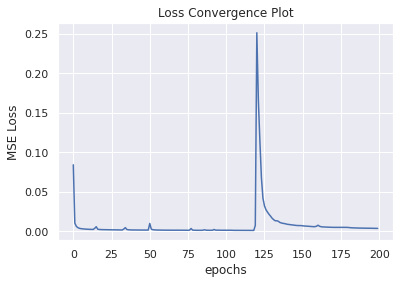

In [9]:
plt.plot_loss(out)

100%|██████████| 5/5 [00:00<00:00, 109.07it/s]

Data Imported



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


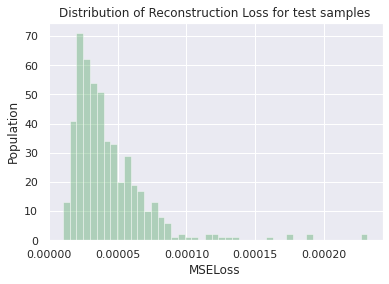

In [10]:
no_sub_recon_loss = Adversarial_AE.evaluate(data_path='no_sub_test.npy', checkpoint_path='./Weights', 
                                            out_path='./Results')        

plt.plot_dist(no_sub_recon_loss)

100%|██████████| 5/5 [00:00<00:00, 107.52it/s]

Data Imported



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


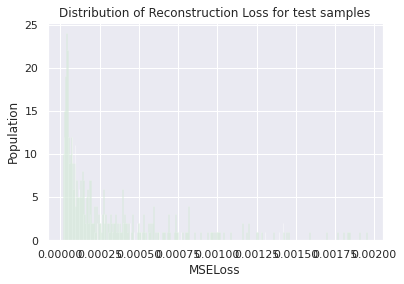

In [11]:
sub_recon_loss = Adversarial_AE.evaluate(data_path='sub_test.npy', checkpoint_path='./Weights', out_path='./Results') 

plt.plot_dist(sub_recon_loss)

### **Comparing mean losses across images with no-substructure and substructure**

We note that mean loss for images with substructure **(anomalies)** is **~6.76 times** mean loss for images without substructure. 

**Hence, our model has been able to generate good embeddings to be able to reconstruct images without substructure effectively.**

In [12]:
no_sub_recon_loss.mean(), sub_recon_loss.mean()

(4.269956e-05, 0.00028876658)

Anomalies are identified for lensing images with substructure and are represented with class as 1. 

**We will now plot the ROC Curve across a range of threshold of reconstruction loss.**

In [13]:
y_test = [0]*len(no_sub_recon_loss) + [1]* len(sub_recon_loss)
y_score = no_sub_recon_loss.tolist() + sub_recon_loss.tolist()

N_DATAPOINTS = 100
thresholds = np.linspace(min(y_score), max(y_score), N_DATAPOINTS)

Calculating **False Positive Rate (FPR)** and **True Positive Rate (TPR)** for various thresholds.

In [14]:
def find_outcome(actual_label, predicted_label):
    
    if (actual_label==predicted_label):
        if (actual_label == 1):
            return 'TP'
        else:
            return 'TN'
        
    else:
        if (actual_label == 1):
            return 'FN'
        else:
            return 'FP'
        
def calculate_roc_metrics(y_test, y_score, threshold, pos_label = 1):
    
    y_pred = (y_score>=threshold)*1
    outcomes = np.array(list(map(lambda x,y: find_outcome(x,y), y_test, y_pred)))
    
    tp = sum(outcomes=='TP')
    tn = sum(outcomes=='TN')
    fp = sum(outcomes=='FP')
    fn = sum(outcomes=='FN')
    
    if tp==0:
        tpr=0
    else:
        tpr = tp/(tp+fn)
    
    if fp==0:
        fpr = 0
    else:
        fpr = fp/(fp+tn)
    
    return fpr, tpr        

In [15]:
roc_metrics = np.array(list(map(lambda x: calculate_roc_metrics(y_test, y_score, x), thresholds)))

fpr = roc_metrics[:,0]
tpr = roc_metrics[:,1]

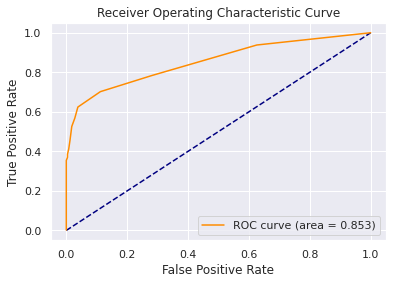

In [22]:
import matplotlib.pyplot as py_plt
from sklearn.metrics import roc_auc_score, auc, roc_curve, plot_roc_curve

roc_auc = auc(fpr, tpr)

py_plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
py_plt.title('Receiver Operating Characteristic Curve')
py_plt.xlabel('False Positive Rate')
py_plt.ylabel('True Positive Rate')

py_plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.3f)' % roc_auc)
py_plt.legend(loc="lower right")

py_plt.show()

In [18]:
cd ..

/content


In [19]:
!zip -r task2.zip /content/unsupervised-lensing

Streaming output truncated to the last 5000 lines.
  adding: content/unsupervised-lensing/data/test_sub_data/sub/image_247300949120712706093900264285849625329.jpg (deflated 5%)
  adding: content/unsupervised-lensing/data/test_sub_data/sub/image_202463687524157265355709888261753368981.jpg (deflated 5%)
  adding: content/unsupervised-lensing/data/test_sub_data/sub/image_176628628867616294551253907569471647147.jpg (stored 0%)
  adding: content/unsupervised-lensing/data/test_sub_data/sub/image_208724432000199108506651221924435221896.jpg (deflated 15%)
  adding: content/unsupervised-lensing/data/test_sub_data/sub/image_28820304993545665037870935283212876390.jpg (deflated 1%)
  adding: content/unsupervised-lensing/data/test_sub_data/sub/image_20349421739582437582388739655089277584.jpg (deflated 15%)
  adding: content/unsupervised-lensing/data/test_sub_data/sub/image_291083089597862644898073117933945351530.jpg (deflated 12%)
  adding: content/unsupervised-lensing/data/test_sub_data/sub/image_